In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
valid_n = [1024 << i for i in range(7)]
valid_k = [2 << i for i in range(6)]
valid_m = [4, 8, 16, 32, 64]
FILE = 'results.csv'

In [126]:
def gen_make_commands():
    CPU = False
   
    i = 1

    for n in valid_n:
        for k in valid_k:
            for m in valid_m:
                if CPU:
                    print(f"$(CC) $(CFLAGS) -DNSAMPLES={n} -DKCLASSES={k} obj/* $^ -o bin/$@-{i} -lm")
                else:
                    print(f"$(CC) -c $(CFLAGS) -DNSAMPLES={n} -DKCLASSES={k} -DMSAMPLERS={m} src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink")
                    print(f"$(CC) $(CFLAGS) -DNSAMPLES={n} -DKCLASSES={k} -DMSAMPLERS={m} obj/* $^ -o bin/$@-{i}")
                i += 1

    with open('run_tests.sh', 'w') as output:
        output.write('echo "N,K,M,Time(usec)" > test/results.csv\n')
        for j in range(1,i):
            output.write(f'./bin/int_test-{j} >> test/results.csv\n')
    
gen_make_commands()

$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=4 src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink
$(CC) $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=4 obj/* $^ -o bin/$@-1
$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=8 src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink
$(CC) $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=8 obj/* $^ -o bin/$@-2
$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=16 src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink
$(CC) $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=16 obj/* $^ -o bin/$@-3
$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=32 src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink
$(CC) $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=32 obj/* $^ -o bin/$@-4
$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=64 src/gmm_gibbs.cu -o obj/gmm_gibbs.o -dlink
$(CC) $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=2 -DMSAMPLERS=64 obj/* $^ -o bin/$@-5
$(CC) -c $(CFLAGS) -DNSAMPLES=1024 -DKCLASSES=4 -DMSAMPLERS=4 src/gmm

In [127]:
df = pd.read_csv(FILE)
df.groupby(by='N').describe()

K                                                       M  \
      count       mean        std  min  25%   50%   75%   max count   
N                                                                     
1024   30.0  21.000000  22.026630  2.0  4.0  12.0  32.0  64.0  30.0   
2048   28.0  21.642857  22.660480  2.0  4.0  12.0  32.0  64.0  28.0   
4096   30.0  21.000000  22.026630  2.0  4.0  12.0  32.0  64.0  30.0   
8192   28.0  21.071429  22.591261  2.0  4.0  12.0  32.0  64.0  28.0   
16384  28.0  19.928571  21.099287  2.0  4.0  12.0  32.0  64.0  28.0   
32768  25.0  22.800000  23.678401  2.0  4.0   8.0  32.0  64.0  25.0   
65536  24.0  20.750000  22.308606  2.0  4.0  12.0  32.0  64.0  24.0   

                  ...             Time(usec)                              \
            mean  ...   75%   max      count          mean           std   
N                 ...                                                      
1024   24.800000  ...  32.0  64.0       30.0  8.003399e+05  1.231102e+06   
2048   23.142857  ...  32.0  64.0       28.0  1.701894e+06  2.575695e+06   
4096   24.800000  ...  32.0  64.0       30.0  3.236384e+06  5.078016e+06   
8192   22.000000  ...  32.0  64.0       28.0  6.526838e+06  9.546699e+06   
16384  25.714286  ...  32.0  64.0       28.0  1.134585e+07  1.799104e+07   
32768  21.760000  ...  32.0  64.0       25.0  2.734231e+07  3.888250e+07   
65536  26.333333  ...  32.0  64.0       24.0  4.535037e+07  7.928726e+07   

                                                                    
             min         25%         50%          75%          max  
N                                                                   
1024     24323.0   126706.25    368576.0    821768.50    5859111.0  
2048     43891.0   277979.75    808032.0   1622815.00   11948702.0  
4096     86149.0   486938.00   1388198.0   3192690.00   23953418.0  
8192    165568.0   964967.00   3109510.0   6473910.75   42664403.0  
16384   324511.0  1663765.25   5192529.5  12279027.00   83841990.0  
32768   717678.0  5096959.00  12278549.0  26671472.00  165873121.0  
65536  1325571.0  6061378.00  18761493.5  35258925.50  331657880.0  

[7 rows x 24 columns]

In [128]:
df = pd.read_csv(FILE)
df.groupby(by='K').describe()

N                                                               \
   count          mean           std     min     25%     50%      75%   
K                                                                       
2   35.0  18578.285714  22063.426736  1024.0  2048.0  8192.0  32768.0   
4   33.0  16725.333333  20939.902833  1024.0  2048.0  8192.0  16384.0   
8   29.0  15854.344828  20123.285546  1024.0  2048.0  8192.0  16384.0   
16  30.0  16145.066667  21408.252741  1024.0  2048.0  8192.0  16384.0   
32  33.0  17470.060606  21063.588206  1024.0  2048.0  8192.0  32768.0   
64  33.0  17221.818182  21124.971316  1024.0  2048.0  8192.0  32768.0   

                M             ...             Time(usec)                \
        max count       mean  ...   75%   max      count          mean   
K                             ...                                        
2   65536.0  35.0  24.800000  ...  32.0  64.0       35.0  2.225552e+06   
4   65536.0  33.0  23.393939  ...  32.0  64.0       33.0  3.606127e+06   
8   65536.0  29.0  23.172414  ...  32.0  64.0       29.0  4.459070e+06   
16  65536.0  30.0  23.200000  ...  32.0  64.0       30.0  7.564447e+06   
32  65536.0  33.0  24.121212  ...  32.0  64.0       33.0  2.119971e+07   
64  65536.0  33.0  25.575758  ...  32.0  64.0       33.0  3.601283e+07   

                                                                             
             std       min         25%         50%         75%          max  
K                                                                            
2   4.177596e+06   24323.0   158493.50    588577.0   2337623.0   21216391.0  
4   6.687081e+06   40767.0   246957.00    949202.0   3887371.0   32806169.0  
8   6.837178e+06   74683.0   440159.00   1665145.0   6204156.0   26671472.0  
16  1.155600e+07  140687.0   857255.75   2983259.5   9830756.5   44090768.0  
32  4.074970e+07  267318.0  1609897.00   6375454.0  25370013.0  212308319.0  
64  6.741595e+07  526261.0  3197831.00  12041715.0  24327228.0  331657880.0  

[6 rows x 24 columns]

In [129]:
# df = pd.read_csv(FILE)
# df.groupby(by='M').describe()

Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')

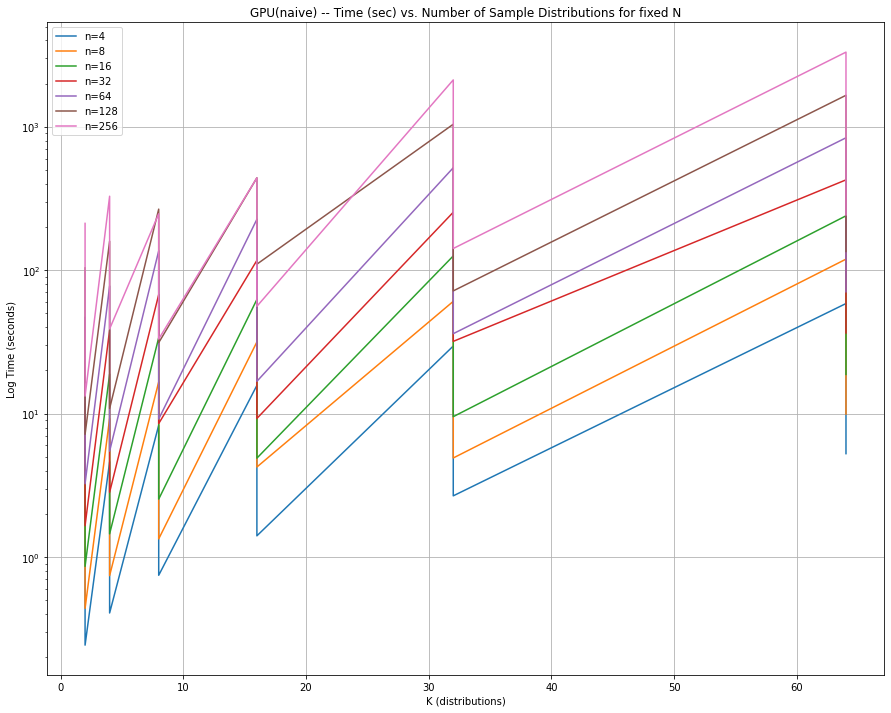

In [130]:
df = pd.read_csv(FILE)
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[(df.N == i)])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')


Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')

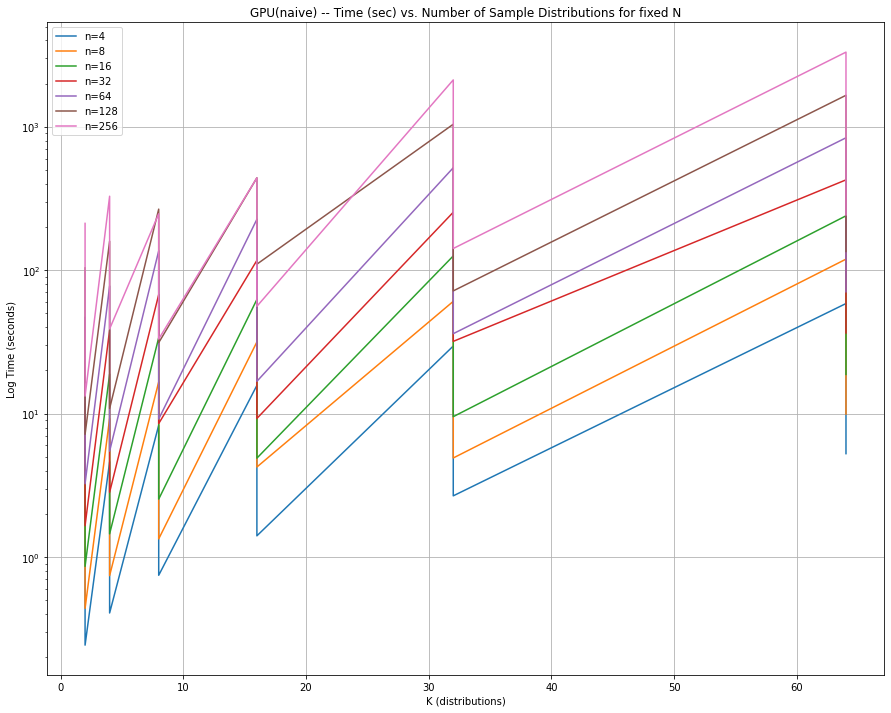

In [131]:
df = pd.read_csv(FILE)
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[(df.N == i)])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')


Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')

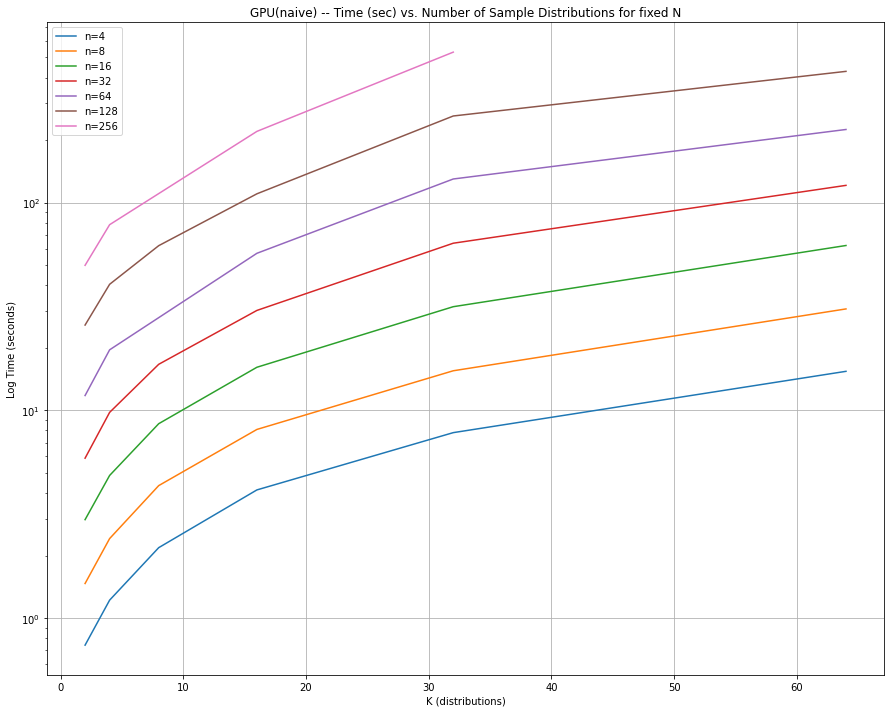

In [132]:
df = pd.read_csv(FILE)
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[(df.N == i) & (df.M == 16)])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')


In [133]:
df.groupby(by=['M']).describe()

N                                                               \
   count          mean           std     min     25%     50%      75%   
M                                                                       
4   40.0  16230.400000  19761.832715  1024.0  2048.0  8192.0  20480.0   
8   39.0  17066.666667  21374.433391  1024.0  2048.0  8192.0  24576.0   
16  39.0  16226.461538  20020.152386  1024.0  2048.0  8192.0  24576.0   
32  39.0  18274.461538  22467.333847  1024.0  2048.0  8192.0  24576.0   
64  36.0  17521.777778  21859.500168  1024.0  2048.0  8192.0  20480.0   

                K             ...             Time(usec)                \
        max count       mean  ...   75%   max      count          mean   
M                             ...                                        
4   65536.0  40.0  21.450000  ...  32.0  64.0       40.0  3.319544e+07   
8   65536.0  39.0  19.743590  ...  32.0  64.0       39.0  1.444392e+07   
16  65536.0  39.0  20.564103  ...  32.0  64.0       39.0  6.967206e+06   
32  65536.0  39.0  21.897436  ...  32.0  64.0       39.0  4.647695e+06   
64  65536.0  36.0  22.166667  ...  32.0  64.0       36.0  2.695700e+06   

                                                                            
             std       min        25%        50%          75%          max  
M                                                                           
4   6.565244e+07  323100.0  2804335.0  9070381.0  25695377.75  331657880.0  
8   2.996228e+07  143068.0  1335926.5  3887371.0  12262148.00  165862608.0  
16  1.166077e+07   74112.0   684886.0  1956023.0   6295701.50   53000145.0  
32  8.606817e+06   39490.0   421121.0  1291850.0   3548714.00   42617195.0  
64  5.068292e+06   24323.0   160472.5   632670.0   2236897.50   24327228.0  

[5 rows x 24 columns]

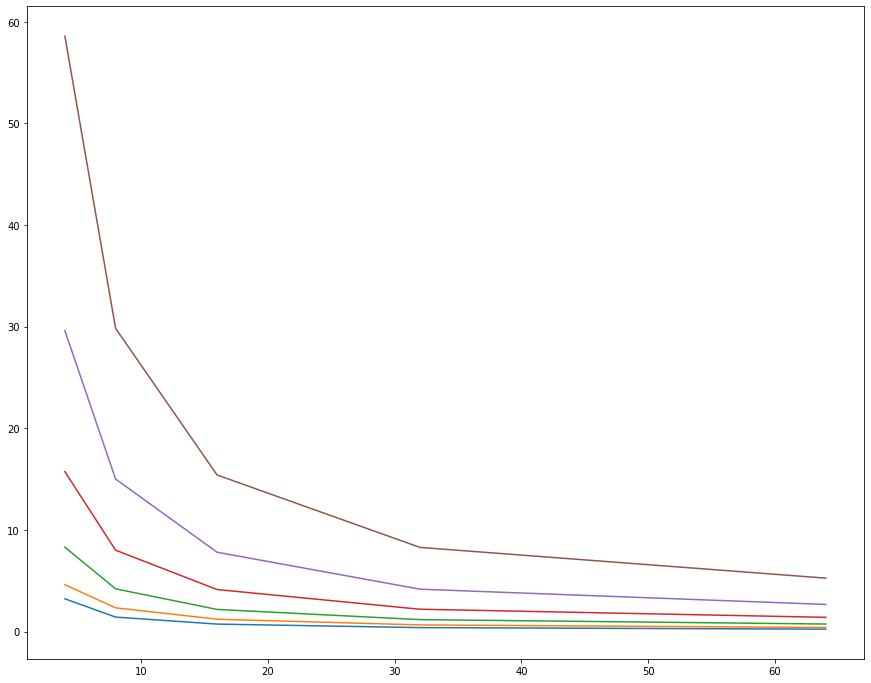

In [134]:
df = pd.read_csv(FILE)
df1 = df[(df.K == 2) & (df.N == 1024)]
df2 = df[(df.K == 4) & (df.N == 1024)]
df3 = df[(df.K == 8) & (df.N == 1024)]
df4 = df[(df.K == 16) & (df.N == 1024)]
df5 = df[(df.K == 32) & (df.N == 1024)]
df6 = df[(df.K == 64) & (df.N == 1024)]
dfs = [df1, df2, df3, df4, df5, df6]
plt.figure(figsize=(15, 12))
for p in dfs:
    plt.subplot()
    plt.plot(p['M'], p['Time(usec)']/100000)

([<matplotlib.axis.XTick at 0x7fc2389baaf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

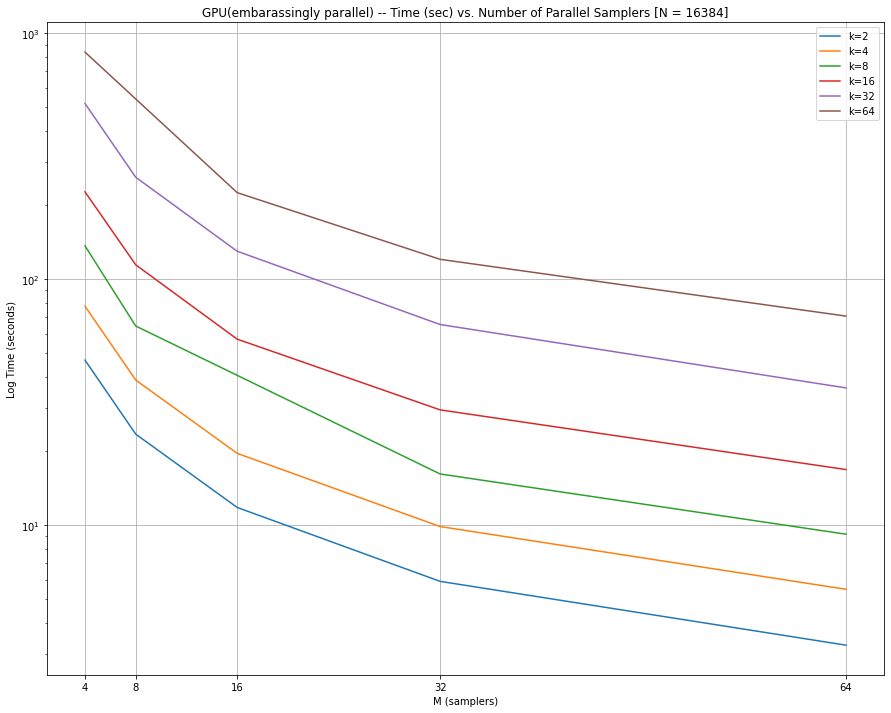

In [139]:
df = pd.read_csv(FILE)
df1 = df[(df.K == 2) & (df.N == 16384)]
df2 = df[(df.K == 4) & (df.N == 16384)]
df3 = df[(df.K == 8) & (df.N == 16384)]
df4 = df[(df.K == 16) & (df.N == 16384)]
df5 = df[(df.K == 32) & (df.N == 16384)]
df6 = df[(df.K == 64) & (df.N == 16384)]
dfs = [df1, df2, df3, df4, df5, df6]
plt.figure(figsize=(15, 12))
for p in dfs:
    plt.subplot()
    plt.plot(p['M'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64'])
plt.xlabel('M (samplers)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(embarassingly parallel) -- Time (sec) vs. Number of Parallel Samplers [N = 16384]')
plt.xticks([4,8,16,32,64])

([<matplotlib.axis.XTick at 0x7fc23a1d1460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

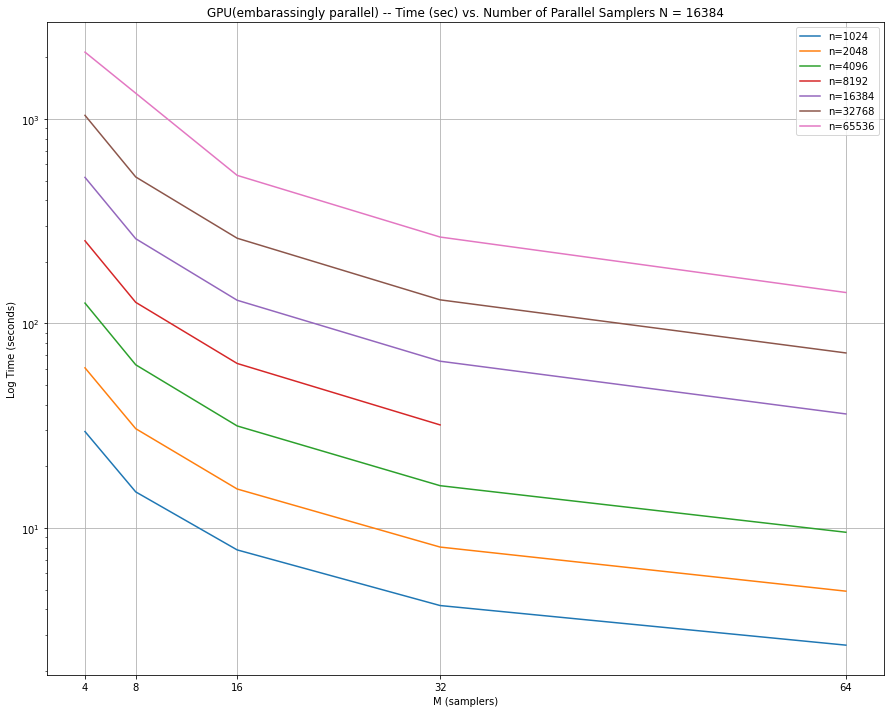

In [137]:
df = pd.read_csv(FILE)
df1 = df[(df.N == 1024) & (df.K == 32)]
df2 = df[(df.N == 2048) & (df.K == 32)]
df3 = df[(df.N == 4096) & (df.K == 32)]
df4 = df[(df.N == 8192) & (df.K == 32)]
df5 = df[(df.N == 16384) & (df.K == 32)]
df6 = df[(df.N == 32768) & (df.K == 32)]
df7 = df[(df.N == 65536) & (df.K == 32)]
dfs = [df1, df2, df3, df4, df5, df6, df7]
plt.figure(figsize=(15, 12))
for p in dfs:
    plt.subplot()
    plt.plot(p['M'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384', 'n=32768', 'n=65536'])
plt.xlabel('M (samplers)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(embarassingly parallel) -- Time (sec) vs. Number of Parallel Samplers N = 16384')
plt.xticks([4,8,16,32,64])

Text(0.5, 1.0, 'GPU(embarassingly parallel) -- Time (sec) vs. Number of Parallel Samplers [M = 32]')

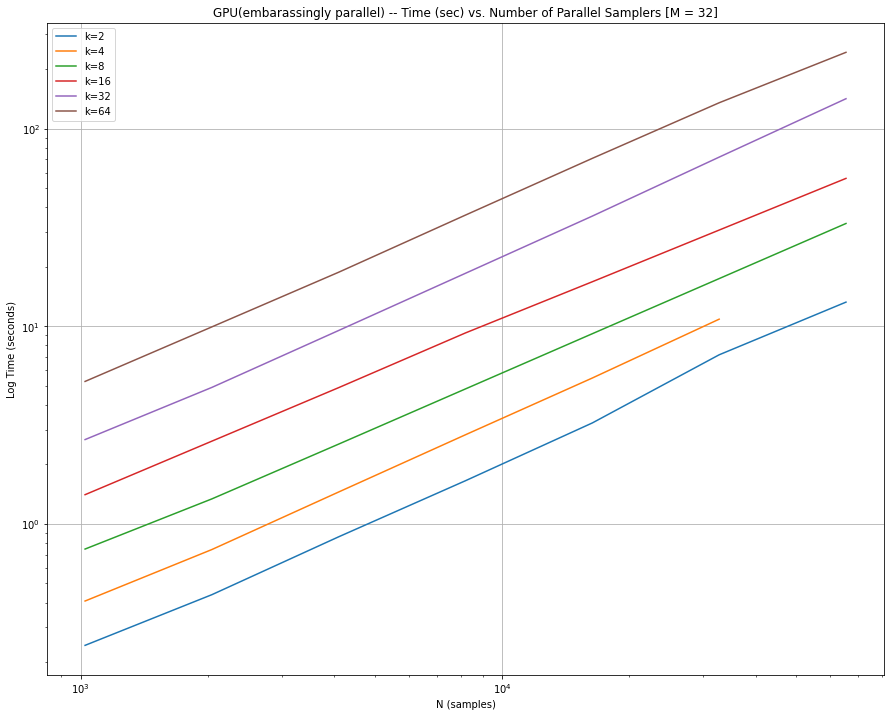

In [152]:
df = pd.read_csv(FILE)
df = df[(df.M == 64)]

df1 = df[(df.K == 2)]
df2 = df[(df.K == 4)]
df3 = df[(df.K == 8)]
df4 = df[(df.K == 16)]
df5 = df[(df.K == 32)]
df6 = df[(df.K == 64)]

dfs = [df1, df2, df3, df4, df5, df6]
plt.figure(figsize=(15, 12))
for p in dfs:
    plt.subplot()
    plt.plot(p['N'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64'])
plt.xlabel('N (samples)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(embarassingly parallel) -- Time (sec) vs. Number of Parallel Samplers [M = 32]')
# plt.xticks([1024,2048,4096,8192,16384, 32768])